In [1]:
import io
import re
import pandas as pd
import networkx as nx

https://stackoverflow.com/questions/63793230/how-to-create-a-directed-graph

In [2]:
s = """index    ID  Link_to Label   Date    Size
0   mary    NaN 0       2020-01-23 1
1   Julie Mirk  1       2020-02-27 12
1   Julie Mark  1       2020-02-27 12
1   Julie Sarah 1       2020-02-27 12
1   Sarah Julie 1       2020-02-27 12
1   Chris Mirk  1       2020-01-26 12
50  Mirk    Chris   0   2020-04-29 4
51  Mark    NaN 0       2020-04-29 3
52  Greg    NaN 0       2020-04-27 2
53  Luke    Matt    0       2020-04-08 1
54  Sarah   James   0       2020-04-01 1"""
df = pd.read_csv(io.StringIO(re.sub("[ ]+", ",", s)), parse_dates=['Date'])
df = df.dropna().drop(["index", "Label", "Size"], axis=1)

In [3]:
df.dtypes

ID                 object
Link_to            object
Date       datetime64[ns]
dtype: object

In [4]:
print(df)

       ID Link_to       Date
1   Julie    Mirk 2020-02-27
2   Julie    Mark 2020-02-27
3   Julie   Sarah 2020-02-27
4   Sarah   Julie 2020-02-27
5   Chris    Mirk 2020-01-26
6    Mirk   Chris 2020-04-29
9    Luke    Matt 2020-04-08
10  Sarah   James 2020-04-01


In [5]:
c = df.merge(df, how='left', left_on=['ID', 'Link_to'], right_on=['Link_to', 'ID'], suffixes=('', '_r'))
c['Date_r'] = c['Date_r'].fillna(c['Date'])
c

,ID,Link_to,Date,ID_r,Link_to_r,Date_r
0,Julie,Mirk,2020-02-27,NaN,NaN,2020-02-27
1,Julie,Mark,2020-02-27,NaN,NaN,2020-02-27
2,Julie,Sarah,2020-02-27,Sarah,Julie,2020-02-27
3,Sarah,Julie,2020-02-27,Julie,Sarah,2020-02-27
4,Chris,Mirk,2020-01-26,Mirk,Chris,2020-04-29
5,Mirk,Chris,2020-04-29,Chris,Mirk,2020-01-26
6,Luke,Matt,2020-04-08,NaN,NaN,2020-04-08
7,Sarah,James,2020-04-01,NaN,NaN,2020-04-01


In [6]:
c['keep'] = c['Date'] <= c['Date_r']
print(c)

      ID Link_to       Date   ID_r Link_to_r     Date_r   keep
0  Julie    Mirk 2020-02-27    NaN       NaN 2020-02-27   True
1  Julie    Mark 2020-02-27    NaN       NaN 2020-02-27   True
2  Julie   Sarah 2020-02-27  Sarah     Julie 2020-02-27   True
3  Sarah   Julie 2020-02-27  Julie     Sarah 2020-02-27   True
4  Chris    Mirk 2020-01-26   Mirk     Chris 2020-04-29   True
5   Mirk   Chris 2020-04-29  Chris      Mirk 2020-01-26  False
6   Luke    Matt 2020-04-08    NaN       NaN 2020-04-08   True
7  Sarah   James 2020-04-01    NaN       NaN 2020-04-01   True


In [7]:
c = c.loc[c['keep'], :]
c

,ID,Link_to,Date,ID_r,Link_to_r,Date_r,keep
0,Julie,Mirk,2020-02-27,NaN,NaN,2020-02-27,True
1,Julie,Mark,2020-02-27,NaN,NaN,2020-02-27,True
2,Julie,Sarah,2020-02-27,Sarah,Julie,2020-02-27,True
3,Sarah,Julie,2020-02-27,Julie,Sarah,2020-02-27,True
4,Chris,Mirk,2020-01-26,Mirk,Chris,2020-04-29,True
6,Luke,Matt,2020-04-08,NaN,NaN,2020-04-08,True
7,Sarah,James,2020-04-01,NaN,NaN,2020-04-01,True


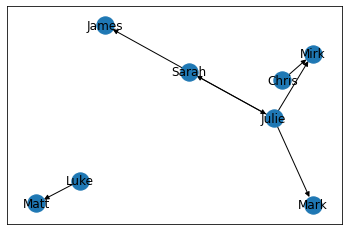

In [9]:
G = nx.from_pandas_edgelist(c, 'ID', 'Link_to', create_using=nx.DiGraph)
nx.draw_networkx(G)